In [1]:
#https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/

In [2]:
import pandas as pd
import yfinance as yf  # Import yfinance and assign it an alias
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.arima.model import ARIMA
import numpy as np


In [3]:
# Define placeholder functions for stockFunctions
def rmsemape(actual, predicted):
    rmse = np.sqrt(np.mean((predicted - actual) ** 2))
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    print(f"RMSE: {rmse}, MAPE: {mape}")
    return rmse, mape


In [4]:
def conversionSingle(data, column_names):
    return pd.DataFrame(data, columns=column_names)


In [5]:
def graph(actual, predicted, actual_label, predicted_label, title, xlabel, ylabel):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10, 6))
    plt.plot(actual, label=actual_label)
    plt.plot(predicted, label=predicted_label)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()


In [6]:
# Fetch stock data using yfinance
start = dt.datetime(2021, 6, 1)
end = dt.datetime(2022, 1, 5)
stk_data = yf.download('AXISBANK.NS', start=start, end=end)

[*********************100%%**********************]  1 of 1 completed


In [7]:
stk_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-06-01,753.549988,754.000000,741.150024,745.150024,742.489990,6660243
2021-06-02,744.799988,745.299988,734.200012,737.000000,734.369080,9973043
2021-06-03,743.000000,752.250000,739.000000,750.650024,747.970398,8170508
2021-06-04,751.000000,759.900024,740.099976,742.049988,739.401001,10336011
2021-06-07,743.099976,753.950012,741.500000,751.099976,748.418701,6986728
...,...,...,...,...,...,...
2021-12-29,674.500000,679.599976,667.250000,670.500000,668.106445,3969894
2021-12-30,668.000000,673.099976,664.500000,668.849976,666.462341,5119705
2021-12-31,672.950012,686.500000,671.200012,678.549988,676.127747,5586980


In [8]:
stk_data=stk_data[["Open","High","Low","Close"]]

In [9]:
# Normalize the data
Ms = MinMaxScaler()
data1 = Ms.fit_transform(stk_data[["Low"]])
print("Len:", data1.shape)


Len: (150, 1)


In [10]:
# ARIMA model orders
orders = [(1, 0, 2), (1, 0, 1), (2, 0, 1), (1, 0, 1)]


In [11]:
# Evaluate ARIMA models
for i in orders:
    model = ARIMA(data1, order=i)
    model_fit = model.fit()
    y_pred = model_fit.predict(0, len(data1) - 1)
    rmsemape(data1, y_pred)


/var/folders/m7/dqkzc2r91x7dhl9_b70f28hr0000gn/T/ipykernel_2349/1410304379.py:4: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((actual - predicted) / actual)) * 100


RMSE: 0.3231598916208481, MAPE: inf
RMSE: 0.3231359856594907, MAPE: inf
RMSE: 0.3231487190091554, MAPE: inf
RMSE: 0.3231359856594907, MAPE: inf


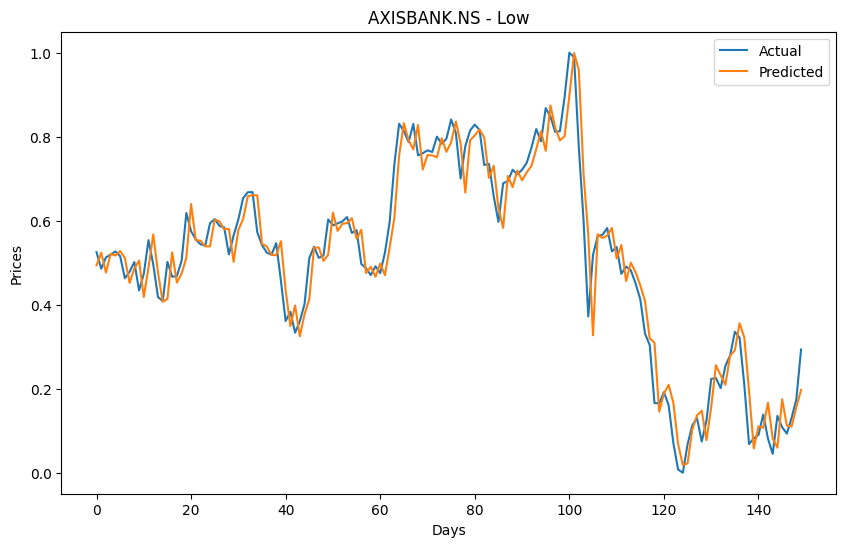

In [12]:
# Plot the last evaluated model
graph(data1, y_pred, "Actual", "Predicted", "AXISBANK.NS - Low", "Days", "Prices")


In [13]:
# Inverse transform to get actual prices
actual_stock_price_test_ori = Ms.inverse_transform(data1)
actual_stock_price_test_oriA = conversionSingle(actual_stock_price_test_ori, ["Low"])


In [14]:
predicted_stock_price_test_ori = Ms.inverse_transform(y_pred.reshape(-1, 1))
predicted_stock_price_test_oriP = conversionSingle(predicted_stock_price_test_ori, ["Low"])


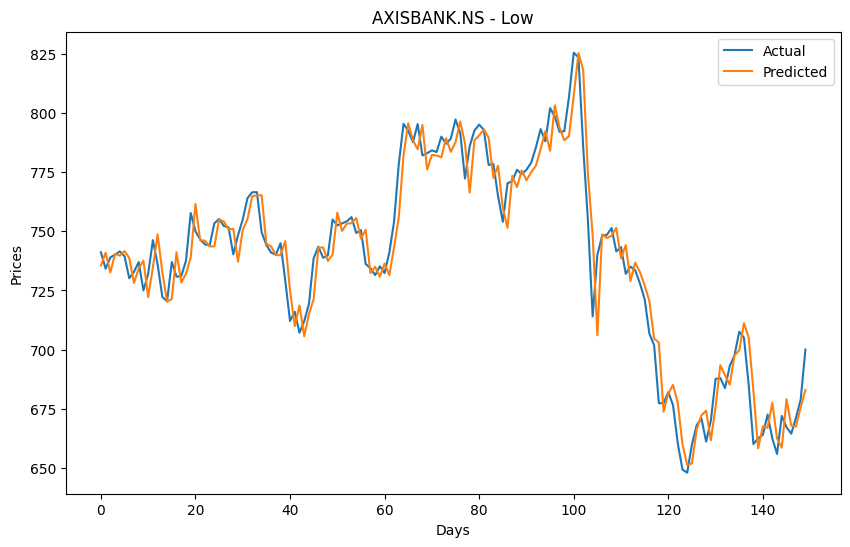

In [15]:
graph(actual_stock_price_test_oriA, predicted_stock_price_test_oriP, "Actual", "Predicted", "AXISBANK.NS - Low", "Days", "Prices")


In [16]:
rmsemape(actual_stock_price_test_oriA, predicted_stock_price_test_oriP)


RMSE: 10.392118634607295, MAPE: 1.0716830988205628


(10.392118634607295, 1.0716830988205628)

In [17]:
# Forecast future prices
forecast = model_fit.predict(len(data1), len(data1) + 3)
forecast_stock_price_test_ori = Ms.inverse_transform(forecast.reshape(-1, 1))
forecast_stock_price_test_oriF = conversionSingle(forecast_stock_price_test_ori, ["Lowfore"])


In [18]:
# Save the forecast to a CSV file
forecast_stock_price_test_oriF.to_csv("LowARMA.csv", index=False)
print(forecast_stock_price_test_oriF)

      Lowfore
0  706.520575
1  708.116838
2  709.625439
3  711.051191
